In [585]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset reading and pre-processing

In [586]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

C:\Users\nandu\AppData\Local\Temp\ipykernel_53528\662064772.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset=pd.read_csv('train.csv')


taking only neccessary columns for analysis

In [587]:
train_dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [588]:
test_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [589]:
import re
def convert_to_months(experience):
    if pd.isna(experience) or not isinstance(experience, str) or experience.strip() == '':
        return np.nan
    experience = experience.strip().lower()
    years = 0
    months = 0
    
    if 'year' in experience:
        years = int(re.search(r'(\d+)\s*Years', experience,re.IGNORECASE).group(1))
    if 'month' in experience:
        months = int(re.search(r'(\d+)\s*Months', experience,re.IGNORECASE).group(1))
    
    total_months = years * 12 + months
    return total_months
train_dataset['Credit_History_Age'] = train_dataset['Credit_History_Age'].apply(convert_to_months)
test_dataset['Credit_History_Age'] = test_dataset['Credit_History_Age'].apply(convert_to_months)

In [590]:
test_dataset['Credit_History_Age']

0        273.0
1        274.0
2          NaN
3        276.0
4        327.0
         ...  
49995      NaN
49996    383.0
49997    384.0
49998    385.0
49999    386.0
Name: Credit_History_Age, Length: 50000, dtype: float64

In [591]:
train_dataset['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

creating pipeline and performing missing value imputation

In [592]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Identify continuous and categorical columns
continuous_columns = ['Monthly_Inhand_Salary',  'Num_Credit_Inquiries', 'Credit_History_Age']
categorical_columns = ['Type_of_Loan','Num_of_Delayed_Payment', 'Amount_invested_monthly','Monthly_Balance']

In [593]:
print(train_dataset[continuous_columns].dtypes)

Monthly_Inhand_Salary    float64
Num_Credit_Inquiries     float64
Credit_History_Age       float64
dtype: object


In [594]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
train_dataset[continuous_columns] = median_imputer.fit_transform(train_dataset[continuous_columns])
test_dataset[continuous_columns] = median_imputer.fit_transform(test_dataset[continuous_columns])

In [595]:
# Impute categorical columns using the most frequent value
mode_imputer = SimpleImputer(strategy='most_frequent')
train_dataset[categorical_columns] = mode_imputer.fit_transform(train_dataset[categorical_columns])
test_dataset[categorical_columns] = mode_imputer.fit_transform(test_dataset[categorical_columns])

In [596]:
#dealing with trailing underscores('_')
def remove_trailing_underscore(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1]
    return value

In [597]:
train_dataset['Age'] = train_dataset['Age'].apply(remove_trailing_underscore)
test_dataset['Age'] = test_dataset['Age'].apply(remove_trailing_underscore)


In [598]:
train_dataset['Age'] = pd.to_numeric(train_dataset['Age'])
test_dataset['Age'] = pd.to_numeric(test_dataset['Age'])

In [599]:
#dealing with unrealistic age
train_dataset.loc[train_dataset['Age'] > 120, 'Age'] = train_dataset['Age'].median()
train_dataset.loc[train_dataset['Age'] < 0, 'Age'] = train_dataset['Age'].median()

test_dataset.loc[test_dataset['Age'] > 120, 'Age'] = test_dataset['Age'].median()
test_dataset.loc[test_dataset['Age'] < 0, 'Age'] = test_dataset['Age'].median()

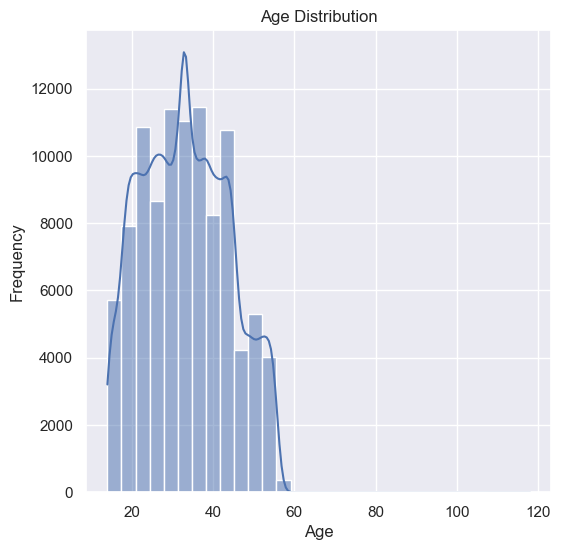

In [600]:
# distribution of age
import seaborn as sns

sns.histplot(train_dataset['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [601]:
# occupation column
train_dataset['Occupation'] = train_dataset['Occupation'].replace('_______', np.nan)
test_dataset['Occupation'] = test_dataset['Occupation'].replace('_______', np.nan)

In [602]:
train_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                            0
SSN                            0
Occupation                  7062
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [603]:
def fill_missing_occupation(df):
    # Group by SSN and find the mode of the Occupation for each group
    most_common_occupation = df.groupby('SSN')['Occupation'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    
    # Fill the missing values with the most common occupation per SSN
    df['Occupation'] = df.apply(lambda row: most_common_occupation[row['SSN']] if pd.isnull(row['Occupation']) else row['Occupation'], axis=1)
    return df

In [604]:
train_dataset = fill_missing_occupation(train_dataset)
test_dataset=fill_missing_occupation(test_dataset)

In [605]:
test_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [606]:
occupation_count = train_dataset['Occupation'].value_counts()
occupation_count

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

Text(0.5, 0, 'Occupation')

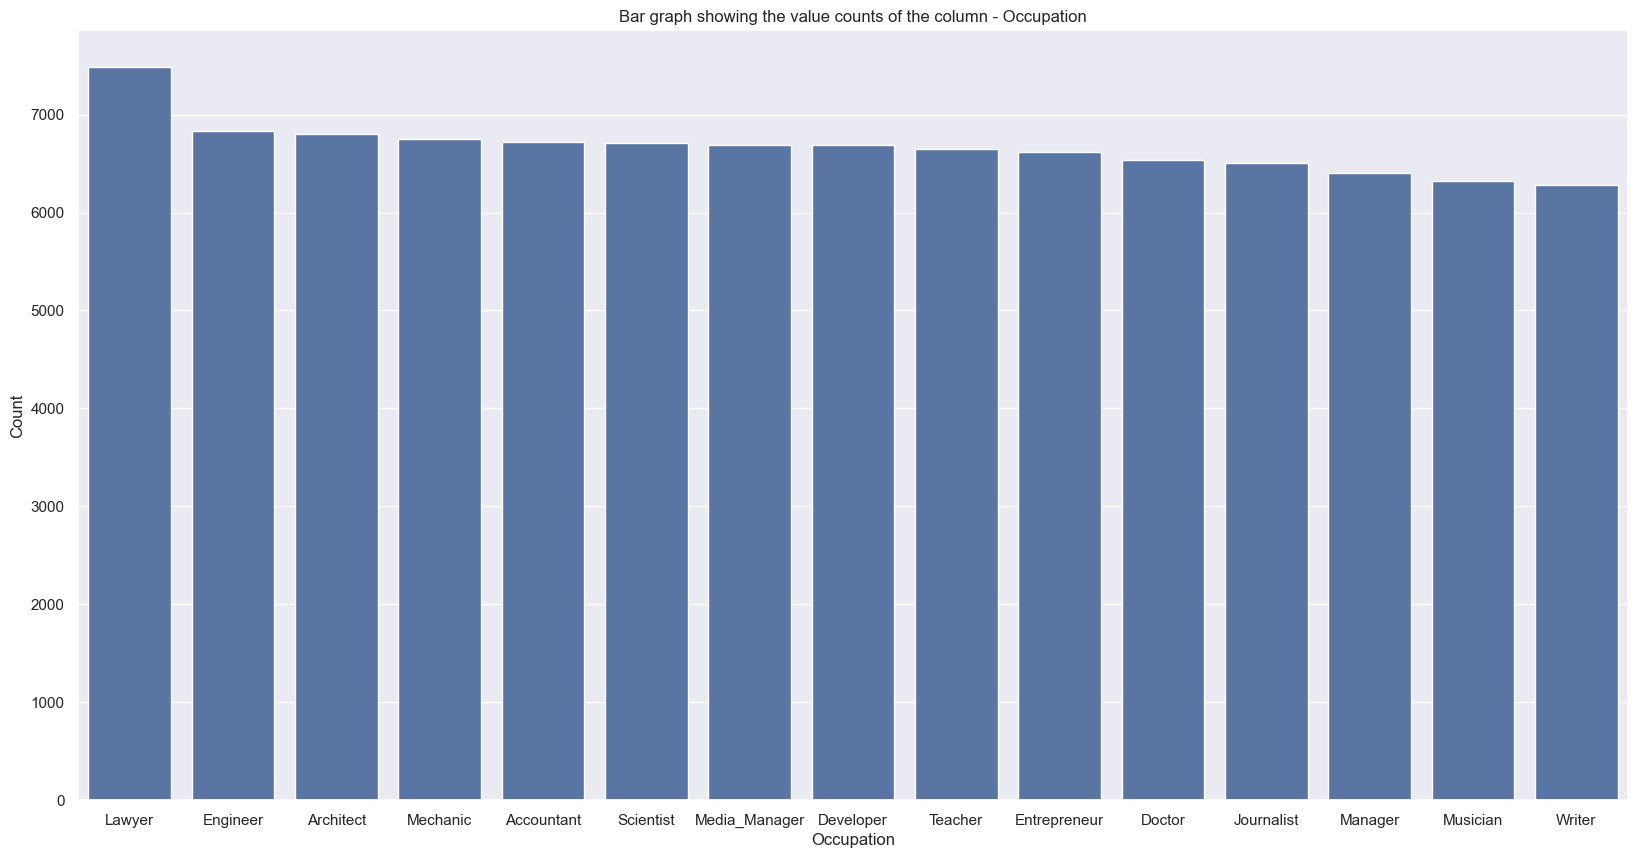

In [607]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

In [608]:
#removing '_' from annual income
train_dataset['Annual_Income'] = train_dataset['Annual_Income'].apply(remove_trailing_underscore)
test_dataset['Annual_Income'] = test_dataset['Annual_Income'].apply(remove_trailing_underscore)

In [609]:
#dealing with num_of_loans
train_dataset['Num_of_Loan'] = train_dataset['Num_of_Loan'].apply(remove_trailing_underscore)
test_dataset['Num_of_Loan'] = test_dataset['Num_of_Loan'].apply(remove_trailing_underscore)

<Axes: xlabel='Num_of_Loan'>

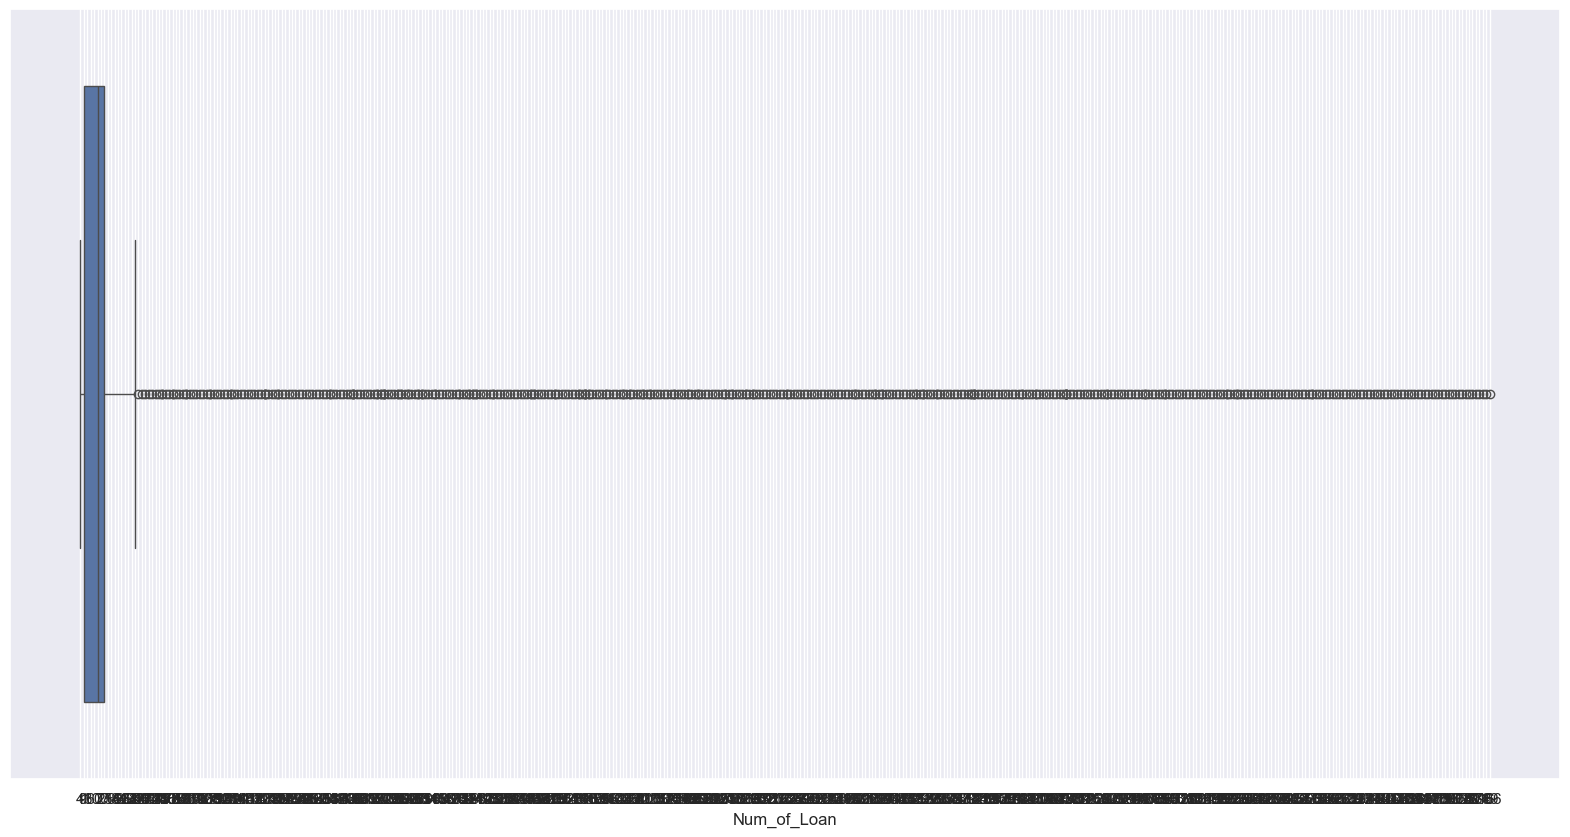

In [610]:
sns.boxplot(x = 'Num_of_Loan', data = train_dataset)


In [611]:
#delay from due date
train_dataset = train_dataset[train_dataset['Delay_from_due_date'] >= 0]
test_dataset= test_dataset[test_dataset['Delay_from_due_date'] >= 0]

In [612]:
#number of delayed payments
train_dataset['Num_of_Delayed_Payment'] = train_dataset['Num_of_Delayed_Payment'].apply(remove_trailing_underscore)
test_dataset['Num_of_Delayed_Payment'] = test_dataset['Num_of_Delayed_Payment'].apply(remove_trailing_underscore)

In [613]:
#changed credit limit
train_dataset = train_dataset[train_dataset['Changed_Credit_Limit'] != '_']
test_dataset = test_dataset[test_dataset['Changed_Credit_Limit'] != '_']

In [614]:
#Credit_Mix
train_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    35720
Good        23336
_           19678
Bad         18591
Name: count, dtype: int64

In [615]:
test_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    17971
Good        11769
_            9558
Bad          9350
Name: count, dtype: int64

In [616]:
train_dataset['Credit_Mix'] = train_dataset['Credit_Mix'].replace('_', 'Unknown')

In [617]:
test_dataset['Credit_Mix'] = test_dataset['Credit_Mix'].replace('_', 'Unknown')

In [618]:
test_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    17971
Good        11769
Unknown      9558
Bad          9350
Name: count, dtype: int64

In [619]:
credit_mix_count = train_dataset['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    35720
Good        23336
Unknown     19678
Bad         18591
Name: count, dtype: int64

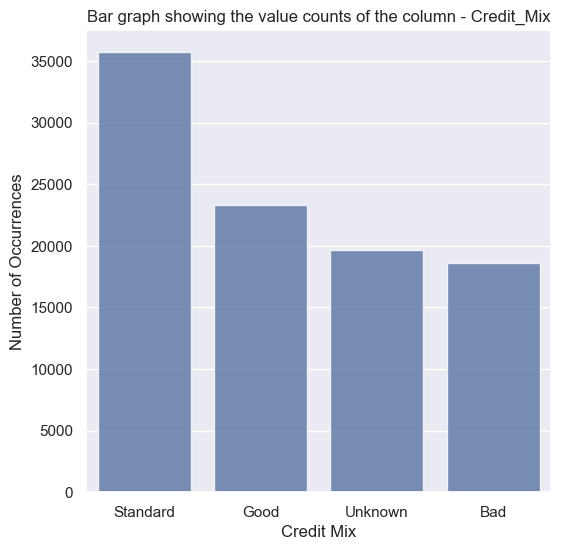

In [620]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

In [621]:
#Outstanding_Debt
train_dataset['Outstanding_Debt'] = train_dataset['Outstanding_Debt'].apply(remove_trailing_underscore)
test_dataset['Outstanding_Debt'] = test_dataset['Outstanding_Debt'].apply(remove_trailing_underscore)

In [622]:
train_dataset['Amount_invested_monthly'] = train_dataset['Amount_invested_monthly'].replace('__10000__', np.nan)




In [623]:
test_dataset['Amount_invested_monthly'] = test_dataset['Amount_invested_monthly'].replace('__10000__', np.nan)

In [624]:
train_dataset['Amount_invested_monthly'] = pd.to_numeric(train_dataset['Amount_invested_monthly'])



In [625]:
test_dataset['Amount_invested_monthly'] = pd.to_numeric(test_dataset['Amount_invested_monthly'])

In [626]:
train_dataset['Amount_invested_monthly'] = train_dataset.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

In [627]:
test_dataset['Amount_invested_monthly'] = test_dataset.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [628]:
test_dataset['Amount_invested_monthly'] = test_dataset['Amount_invested_monthly'].replace(np.nan,0)

In [629]:
test_dataset['Amount_invested_monthly'].isna().sum()

0

In [630]:
#payment behaviour
train_dataset['Payment_Behaviour'] = train_dataset['Payment_Behaviour'].replace('!@9#%8', np.nan)

test_dataset['Payment_Behaviour'] = test_dataset['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [631]:
train_dataset['Payment_Behaviour'] = train_dataset.groupby(
    'Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode()))

In [632]:
test_dataset['Payment_Behaviour'] = test_dataset.groupby(
    'Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode()))

In [633]:
test_dataset.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12366
High_spent_Medium_value_payments     8681
High_spent_Large_value_payments      6656
Low_spent_Medium_value_payments      6647
High_spent_Small_value_payments      5518
Low_spent_Large_value_payments       5096
Name: count, dtype: int64

In [634]:
#Monthly_Balance
train_dataset['Monthly_Balance'] = train_dataset['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)

train_dataset['Monthly_Balance'] = train_dataset.groupby(
    'Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mode()))

C:\Users\nandu\AppData\Local\Temp\ipykernel_53528\1816091486.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mode()))


In [635]:
credit_score_count = train_dataset['Credit_Score'].value_counts()


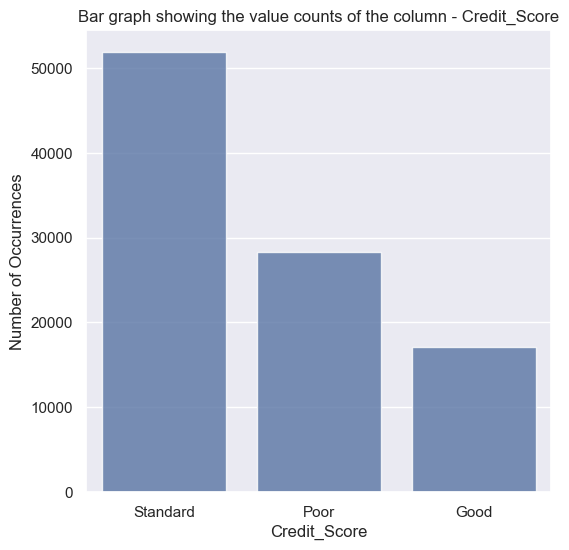

In [636]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_score_count.index, y=credit_score_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Score')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit_Score', fontsize=12)
plt.show()

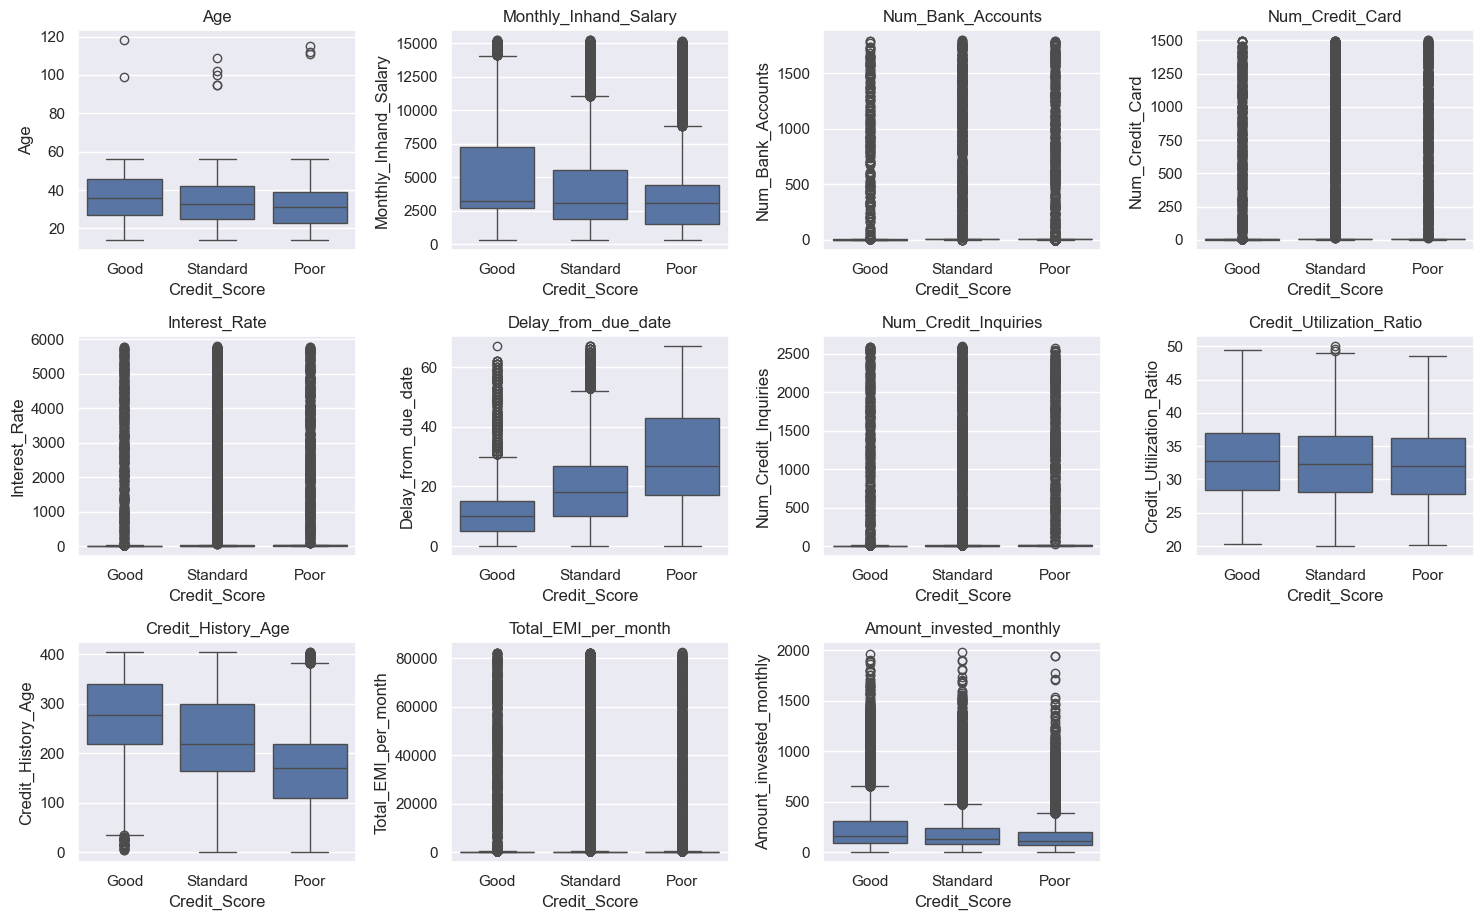

In [637]:
df_numeric_cols = [col for col in train_dataset.columns if train_dataset[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=train_dataset)
    plt.title(col)
plt.tight_layout()
plt.show()

In [638]:
# outlier deletion
df_num = train_dataset.select_dtypes(include='number')
for column in df_num.columns:
    for i in train_dataset["Credit_Score"].unique():
        selected_i = train_dataset[train_dataset["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        train_dataset.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([23230, 28718], dtype='int64')
Age Standard Index([29316, 31288, 38248, 56166, 78564], dtype='int64')
Age Poor Index([5921, 32555, 81398], dtype='int64')
Monthly_Inhand_Salary Good Index([], dtype='int64')
Monthly_Inhand_Salary Standard Index([], dtype='int64')
Monthly_Inhand_Salary Poor Index([ 7107,  7108,  8682,  8683,  8684,  8685,  8687,  8690,  8691,  8693,
       ...
       95989, 95991, 96233, 96234, 96235, 96236, 96238, 98258, 98259, 98260],
      dtype='int64', length=188)
Num_Bank_Accounts Good Index([  356,   807,  1238,  1602,  4343,  4430,  4449,  6005,  8062,  8140,
       ...
       95521, 95729, 96155, 96595, 96722, 97377, 98156, 99029, 99570, 99591],
      dtype='int64', length=166)
Num_Bank_Accounts Standard Index([  267,   288,   339,  1245,  1299,  1438,  1469,  1697,  1864,  2137,
       ...
       97962, 98000, 98217, 98230, 98291, 98300, 98505, 98749, 99343, 99722],
      dtype='int64', length=485)
Num_Bank_Accounts Poor Index([ 1057,  1122,  1323

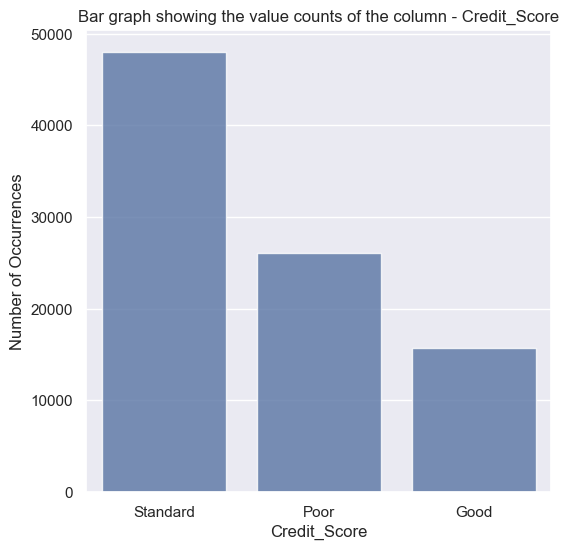

In [639]:
new_credit_score_count = train_dataset['Credit_Score'].value_counts()

sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=new_credit_score_count.index, y=new_credit_score_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Score')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit_Score', fontsize=12)
plt.show()

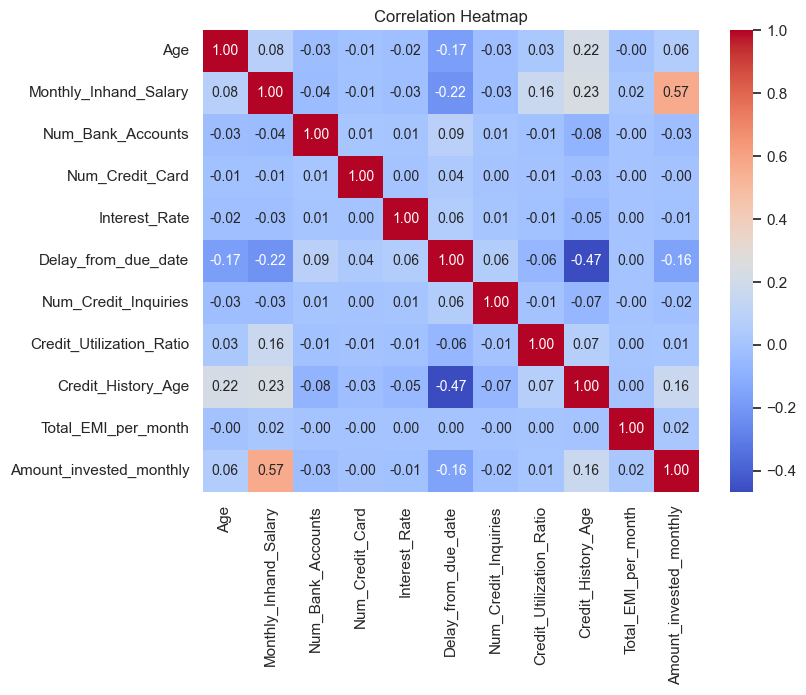

In [640]:
numeric_df = train_dataset.select_dtypes(include=['number'])
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# Encoding categorical data

In [641]:
from sklearn.preprocessing import LabelEncoder
label_encoder_occupation= LabelEncoder()
label_encoder_Type_of_Loan= LabelEncoder()
label_encoder_Credit_Mix= LabelEncoder()
label_encoder_Payment_of_Min_Amount= LabelEncoder()
label_encoder_Payment_Behaviour= LabelEncoder()
label_encoder_Credit_Score= LabelEncoder()

train_dataset['Occupation']=label_encoder_occupation.fit_transform(train_dataset['Occupation'])
train_dataset['Type_of_Loan']=label_encoder_Type_of_Loan.fit_transform(train_dataset['Type_of_Loan'])
train_dataset['Credit_Mix']=label_encoder_Credit_Mix.fit_transform(train_dataset['Credit_Mix'])
train_dataset['Payment_of_Min_Amount']=label_encoder_Payment_of_Min_Amount.fit_transform(train_dataset['Payment_of_Min_Amount'])
train_dataset['Payment_Behaviour']=label_encoder_Payment_Behaviour.fit_transform(train_dataset['Payment_Behaviour'])
train_dataset['Credit_Score']=label_encoder_Credit_Score.fit_transform(train_dataset['Credit_Score'])


In [642]:
test_label_encoder_occupation= LabelEncoder()
test_label_encoder_Type_of_Loan= LabelEncoder()
test_label_encoder_Credit_Mix= LabelEncoder()
test_label_encoder_Payment_of_Min_Amount= LabelEncoder()
test_label_encoder_Payment_Behaviour= LabelEncoder()

test_dataset['Occupation']=test_label_encoder_occupation.fit_transform(test_dataset['Occupation'])
test_dataset['Type_of_Loan']=test_label_encoder_Type_of_Loan.fit_transform(test_dataset['Type_of_Loan'])
test_dataset['Credit_Mix']=test_label_encoder_Credit_Mix.fit_transform(test_dataset['Credit_Mix'])
test_dataset['Payment_of_Min_Amount']=test_label_encoder_Payment_of_Min_Amount.fit_transform(test_dataset['Payment_of_Min_Amount'])
test_dataset['Payment_Behaviour']=test_label_encoder_Payment_Behaviour.fit_transform(test_dataset['Payment_Behaviour'])

In [643]:
#only keeping the columns important for analysis
columns_to_drop=['ID','Customer_ID','Month','Name','Age','SSN']
train_dataset.drop(columns=columns_to_drop,inplace=True)
test_dataset.drop(columns=columns_to_drop,inplace=True)

In [644]:
columns=['Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Monthly_Balance']
for col in columns:
    train_dataset[col] = pd.to_numeric(train_dataset[col], errors='coerce')
    test_dataset[col] = pd.to_numeric(test_dataset[col], errors='coerce')

In [645]:
x = train_dataset.drop("Credit_Score", axis=1)
y = train_dataset.Credit_Score

In [646]:
train_dataset.dtypes

Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int32
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                  int32
dtype: object

In [647]:
x.isna().sum()

Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit          0
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance             819
dtype: int64

In [648]:
for col in columns:
    x[col].fillna(x[col].mean(), inplace=True)

C:\Users\nandu\AppData\Local\Temp\ipykernel_53528\3735308885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(x[col].mean(), inplace=True)


In [649]:
from imblearn.over_sampling import SMOTE

 # Synthetic Minority Oversampling Technique

smote = SMOTE()
X, y = smote.fit_resample(x,y)

# train-test split

In [650]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y, shuffle=True, random_state=42)

# Normalising the data

In [652]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN MODEL

In [653]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (100812, 21) (100812,)
Testing set shape: (43206, 21) (43206,)


In [654]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [655]:
model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1])) 

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [656]:
Dense(units=256, activation='relu')
Dense(units=128, activation='relu')
Dense(units=128, activation='relu')
Dense(units=64, activation='relu')
Dense(units=32, activation='relu')
Dense(units=16, activation='relu')

<Dense name=dense_21, built=False>

In [657]:
Dense(units=3, activation='softmax')

<Dense name=dense_22, built=False>

In [658]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [659]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=900)

Epoch 1/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2298 - loss: 5.1375 - val_accuracy: 0.4507 - val_loss: 1.0152
Epoch 2/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4819 - loss: 0.9956 - val_accuracy: 0.5449 - val_loss: 0.9627
Epoch 3/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 0.9503 - val_accuracy: 0.5921 - val_loss: 0.9375
Epoch 4/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5951 - loss: 0.9242 - val_accuracy: 0.5898 - val_loss: 0.9109
Epoch 5/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6129 - loss: 0.9096 - val_accuracy: 0.6061 - val_loss: 0.9070
Epoch 6/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.9077 - val_accuracy: 0.6032 - val_loss: 0.8908
Epoch 7/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.8804 - val_accuracy: 0.6081 - val_loss: 0.8778
Epoch 8/900
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.8786 - val_accu